<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/Spaciotemporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install required libraries (run once)
!pip install rasterio matplotlib

# Step 3: Import libraries
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from datetime import datetime
import calendar

Mounted at /content/drive


In [ ]:
# Step 4: Set path to your results folder (update if needed)
folder_path = '/content/drive/MyDrive/results'  # From your screenshot


Found files:
Clip_OutRaster_NDVI_2019_01_LC.tif
Clip_OutRaster_NDVI_2019_01_UVS.tif
Clip_OutRaster_NDVI_2019_02_LC.tif
Clip_OutRaster_NDVI_2019_02_UVS.tif
Clip_OutRaster_NDVI_2019_03_LC.tif
Clip_OutRaster_NDVI_2019_03_UVS.tif
Clip_OutRaster_NDVI_2019_04_LC.tif
Clip_OutRaster_NDVI_2019_04_UVS.tif
Clip_OutRaster_NDVI_2019_05_LC.tif
Clip_OutRaster_NDVI_2019_05_UVS.tif
Clip_OutRaster_NDVI_2019_06_LC.tif
Clip_OutRaster_NDVI_2019_06_UVS.tif
Clip_OutRaster_NDVI_2019_07_LC.tif
Clip_OutRaster_NDVI_2019_07_UVS.tif
Clip_OutRaster_NDVI_2019_08_LC.tif
Clip_OutRaster_NDVI_2019_08_UVS.tif
Clip_OutRaster_NDVI_2019_09_LC.tif
Clip_OutRaster_NDVI_2019_09_UVS.tif
Clip_OutRaster_NDVI_2019_10_LC.tif
Clip_OutRaster_NDVI_2019_10_UVS.tif
Clip_OutRaster_NDVI_2019_11_LC.tif
Clip_OutRaster_NDVI_2019_11_UVS.tif
Clip_OutRaster_NDVI_2019_12_LC.tif
Clip_OutRaster_NDVI_2019_12_UVS.tif
Clip_OutRaster_NDVI_2020_01_LC.tif
Clip_OutRaster_NDVI_2020_01_UVS.tif
Clip_OutRaster_NDVI_2020_02_LC.tif
Clip_OutRaster_NDVI_2020_02_U

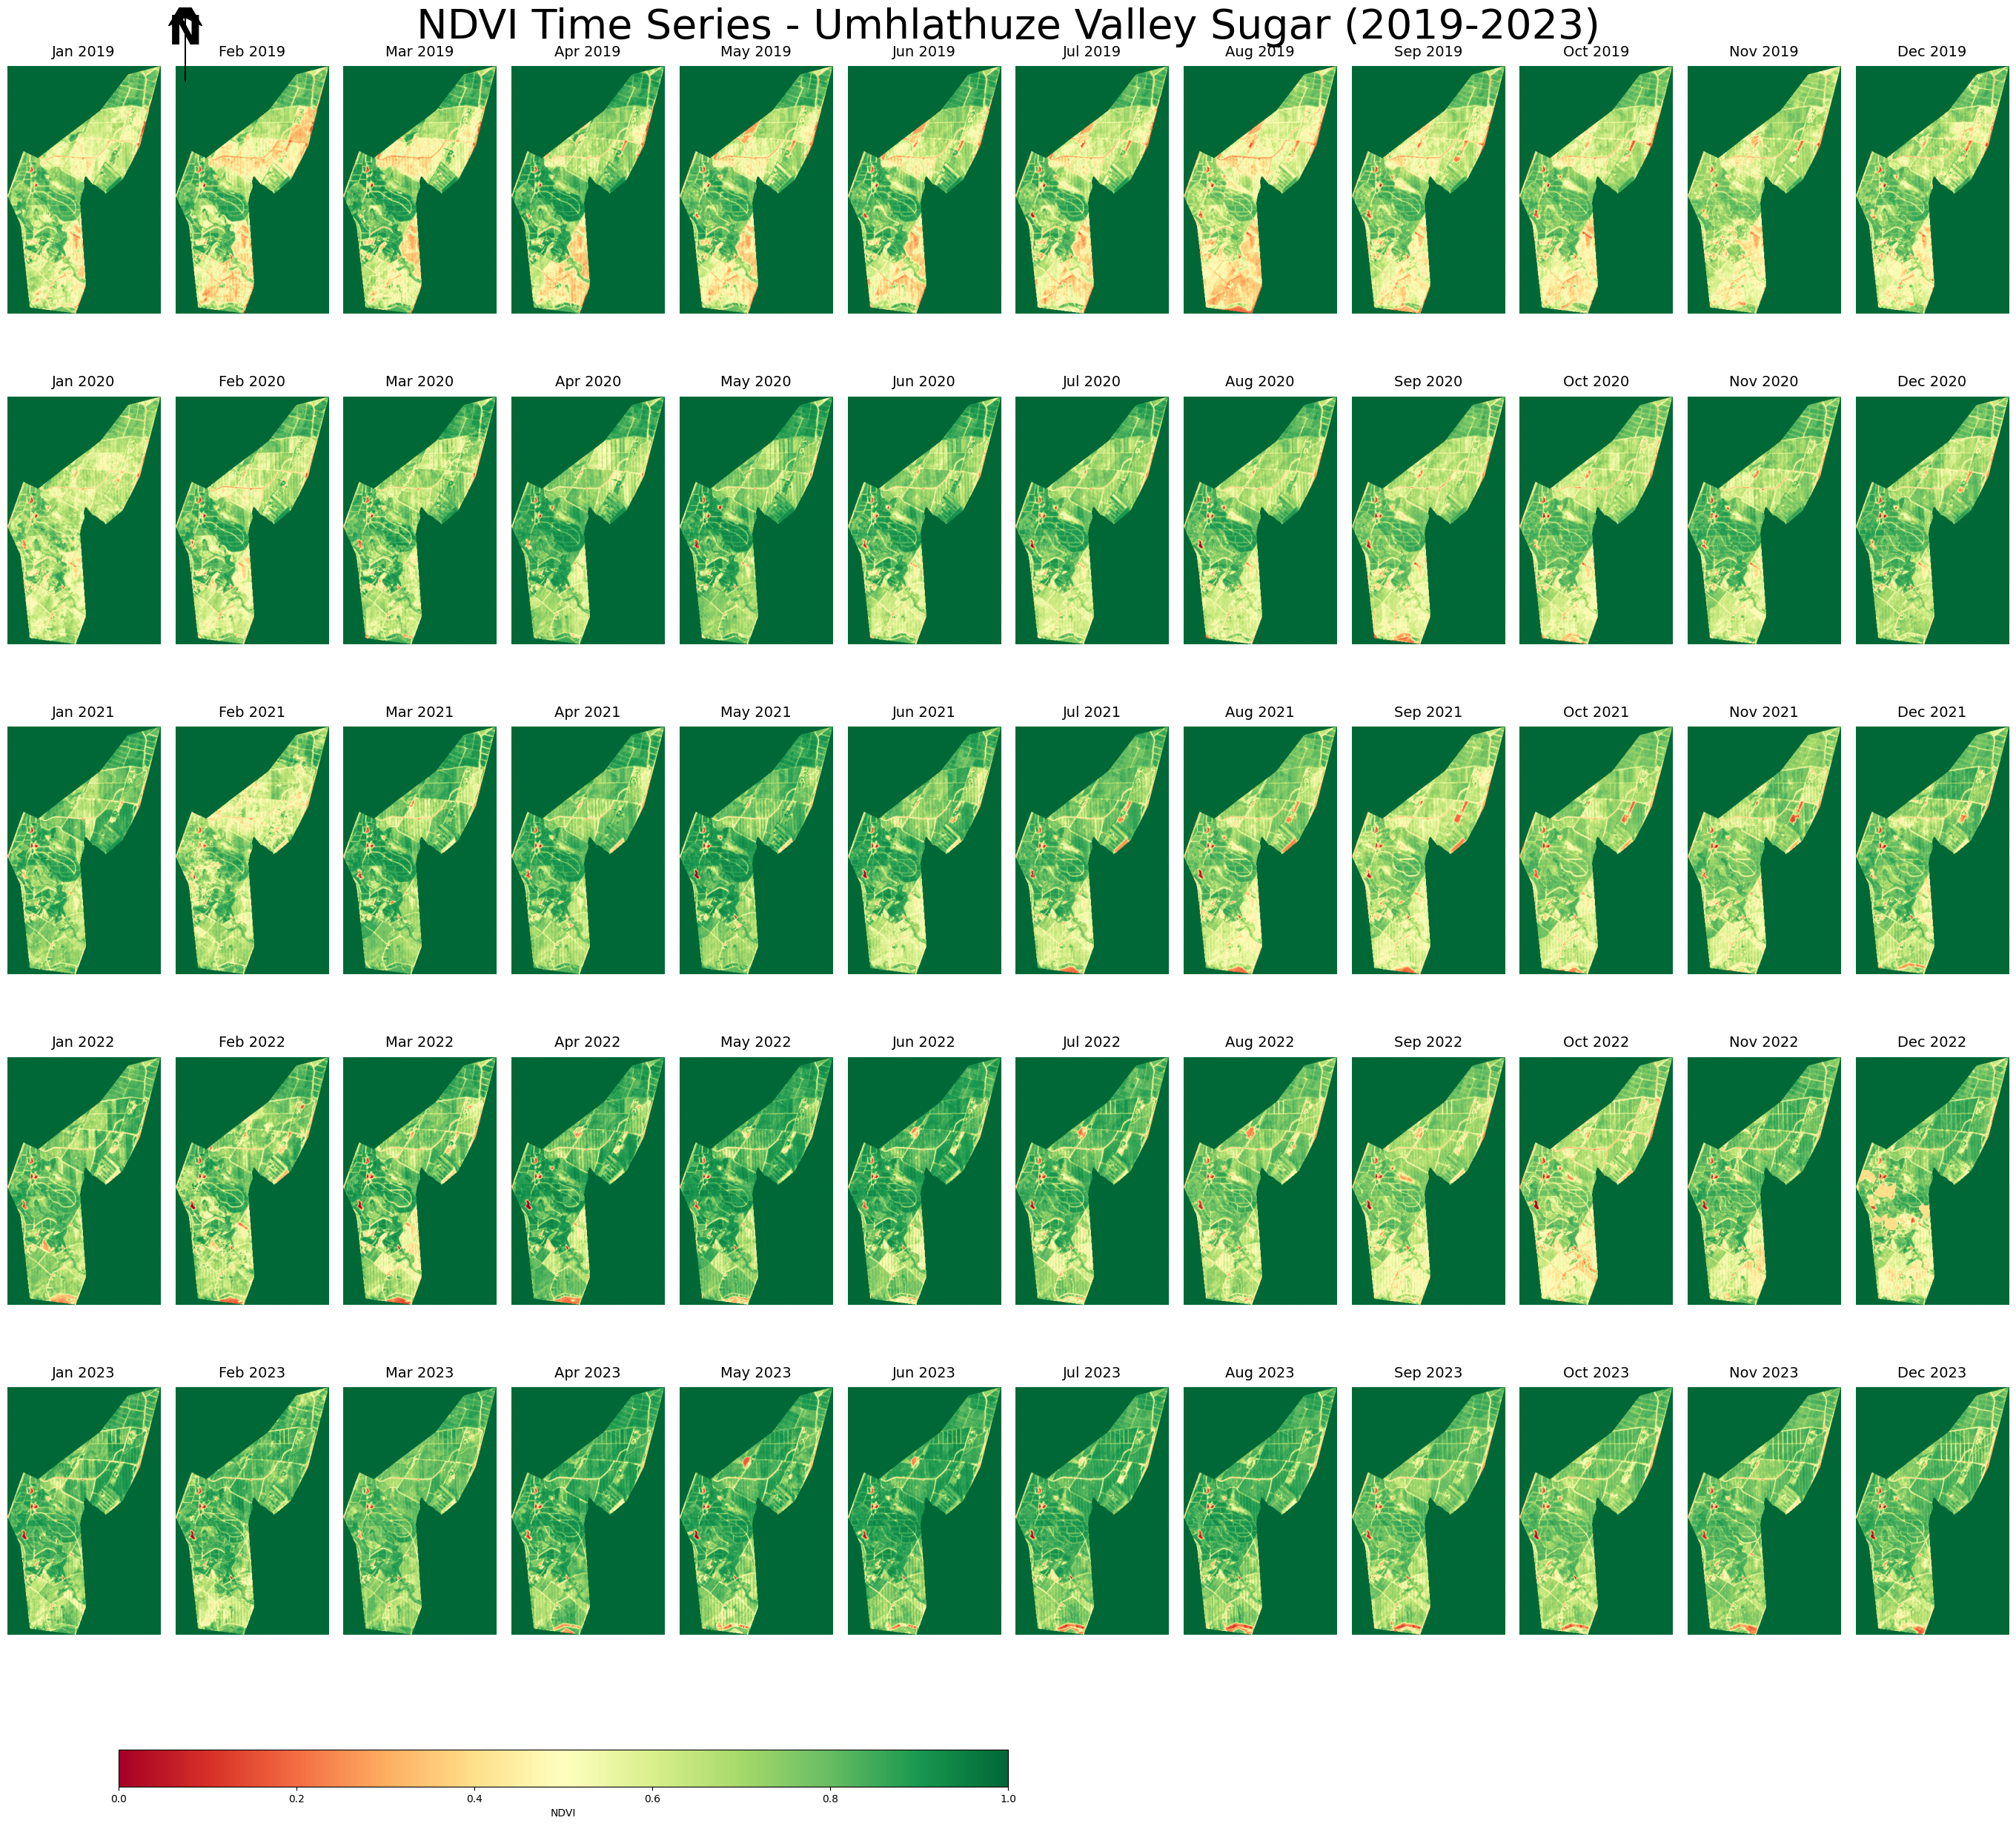

In [ ]:
# Step 5: Collect and sort the NDVI raster files
# We'll include both LC (likely land cover clipped) and UVS (your farm/study area)
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif') and 'NDVI' in f]
tif_files.sort()  # Sort alphabetically — your naming ensures chronological order

print("Found files:")
for f in tif_files:
    print(f)

# Step 6: Parse dates and create proper labels
dates = []
labels = []

for f in tif_files:
    # Extract year and month from filename: e.g., 2019_01
    parts = f.split('_')
    year = int(parts[-3])      # 2019, 2020, etc.
    month_str = parts[-2]      # 01, 02, etc.

    # Approximate month for each quarter (common practice: 01=Jan, 02=Apr, 03=Jul, 04=Oct)
    # The original filenames use 01-12 for months, so we can use them directly.
    month_map = {
        '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6,
        '07': 7, '08': 8, '09': 9, '10': 10, '11': 11, '12': 12
    }
    month_num = month_map[month_str]
    month_name = calendar.month_abbr[month_num]

    dates.append(datetime(year, month_num, 1))
    labels.append(f"{month_name} {year}")

# Step 7: Define consistent NDVI colormap (red-yellow-green)
colors = plt.cm.RdYlGn(np.linspace(0, 1, 256))
ndvi_cmap = ListedColormap(colors)

# Step 8: Create the grid plot (5 rows per year ≈ like your examples)
years = sorted(set(d.year for d in dates))
n_years = len(years)
fig, axes = plt.subplots(n_years, 12, figsize=(30, 5 * n_years), constrained_layout=False)

# If only one year, axes won't be 2D — handle it
if n_years == 1:
    axes = axes.reshape(1, -1)

vmin, vmax = 0.0, 1.0  # Standard NDVI range for consistency

for i, tif in enumerate(tif_files):
    file_path = os.path.join(folder_path, tif)

    with rasterio.open(file_path) as src:
        data = src.read(1)  # First band
        data = np.ma.masked_where(data < -9999, data)  # Mask nodata if needed

        # Calculate subplot position
        year_idx = years.index(dates[i].year)
        month_idx = dates[i].month - 1  # 0-11

        ax = axes[year_idx, month_idx]

        # Plot raster
        im = ax.imshow(data, cmap=ndvi_cmap, vmin=vmin, vmax=vmax)

        ax.set_title(labels[i], fontsize=14, pad=10)
        ax.axis('off')  # Hide axes for cleaner look

# Turn off unused subplots (in case incomplete years)
for ax in axes.flatten():
    if not ax.has_data():
        ax.axis('off')

# Step 9: Add shared colorbar at bottom
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, hspace=0.3, wspace=0.1)
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='NDVI')
cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Step 10: Add main title and North arrow
fig.suptitle('NDVI Time Series - Study Area (2019-2023)', fontsize=20, y=0.98)

# North arrow (simple)
north_ax = fig.add_axes([0.08, 0.88, 0.1, 0.1])
north_ax.text(0.5, 0.8, 'N', fontsize=40, ha='center', fontweight='bold')
north_ax.arrow(0.5, 0.6, 0, 0.3, head_width=0.15, head_length=0.15, fc='black', overhang=0.3)
north_ax.set_xlim(0,1)
north_ax.set_ylim(0,1)
north_ax.axis('off')

plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from datetime import datetime
import calendar
import rasterio

# Set font to Arial (assuming Arial is available; if not, it will default to sans-serif)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 40  # Base font size increase (will affect defaults)

# Step 4: Set path to your results folder (update if needed)
folder_path = '/content/drive/MyDrive/results'  # From your screenshot

# Step 5: Collect and sort the NDVI raster files (includes both LC and UVS)
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif') and 'NDVI' in f]
tif_files.sort()  # Sort alphabetically — your naming ensures chronological order

print("Found files:")
for f in tif_files:
    print(f)

# Step 6: Parse dates and create proper labels
dates = []
labels = []

for f in tif_files:
    # Extract year and month from filename: e.g., 2019_01
    parts = f.split('_')
    year = int(parts[-3])      # 2019, 2020, etc.
    month_str = parts[-2]      # 01, 02, etc.

    month_map = {
        '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6,
        '07': 7, '08': 8, '09': 9, '10': 10, '11': 11, '12': 12
    }
    month_num = month_map[month_str]
    month_name = calendar.month_abbr[month_num]

    dates.append(datetime(year, month_num, 1))
    labels.append(f"{month_name} {year}")

# Step 7: Define consistent NDVI colormap (red-yellow-green)
colors = plt.cm.RdYlGn(np.linspace(0, 1, 256))
ndvi_cmap = ListedColormap(colors)

# Step 8: Create the grid plot (larger figsize for bigger maps)
years = sorted(set(d.year for d in dates))
n_years = len(years)
fig, axes = plt.subplots(n_years, 12, figsize=(60, 10 * n_years), constrained_layout=False)

# If only one year, axes won't be 2D — handle it
if n_years == 1:
    axes = axes.reshape(1, -1)

vmin, vmax = 0.0, 1.0  # Standard NDVI range for consistency

for i, tif in enumerate(tif_files):
    file_path = os.path.join(folder_path, tif)

    with rasterio.open(file_path) as src:
        data = src.read(1)  # First band
        data = np.ma.masked_where(data < -9999, data)  # Mask nodata if needed

        # Calculate subplot position
        year_idx = years.index(dates[i].year)
        month_idx = dates[i].month - 1  # 0-11

        ax = axes[year_idx, month_idx]

        # Plot raster (larger maps via bigger fig)
        im = ax.imshow(data, cmap=ndvi_cmap, vmin=vmin, vmax=vmax)

        ax.set_title(labels[i], fontsize=56, pad=20)  # 14*4=56
        ax.axis('on')  # Turn axes on to see edges (ticks and frames visible)

# Turn off unused subplots (in case incomplete years)
for ax in axes.flatten():
    if not ax.has_data():
        ax.axis('off')

# Step 9: Add shared colorbar at bottom (larger fonts)
fig.subplots_adjust(bottom=0.15, top=0.92, left=0.05, right=0.95, hspace=0.2, wspace=0.05)  # Adjusted for larger size
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.04])  # Slightly larger colorbar height
cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cb.set_label('NDVI', fontsize=40)  # Larger label
cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.ax.tick_params(labelsize=32)  # Larger ticks

# Step 10: Add main title and North arrow (larger)
fig.suptitle('NDVI Time Series - Study Area (2019-2023)', fontsize=80, y=0.98)  # 20*4=80

# North arrow (larger size and fonts)
north_ax = fig.add_axes([0.05, 0.85, 0.2, 0.2])  # Larger north arrow area
north_ax.text(0.5, 0.8, 'N', fontsize=80, ha='center', fontweight='bold')
north_ax.arrow(0.5, 0.6, 0, 0.3, head_width=0.15, head_length=0.15, fc='black', overhang=0.3)
north_ax.set_xlim(0,1)
north_ax.set_ylim(0,1)
north_ax.axis('off')

plt.show()